# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

## Importing libraries and loading dataset

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")

## Investigating and cleaning dataset

In [2]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
penguins_df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [4]:
penguins_clean = penguins_df.dropna()

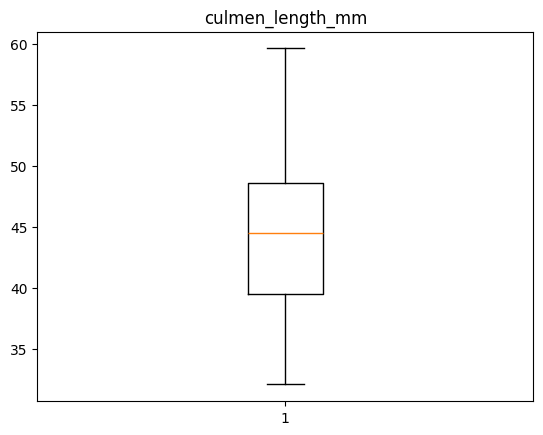

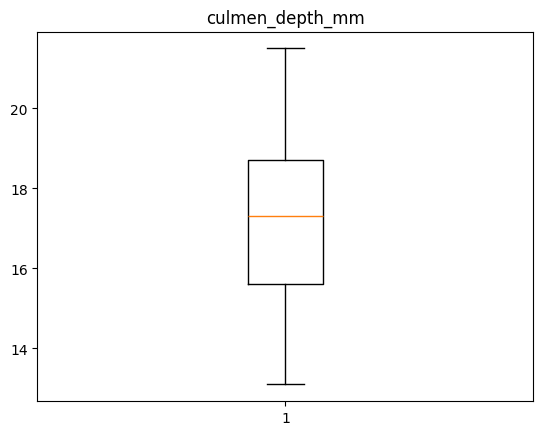

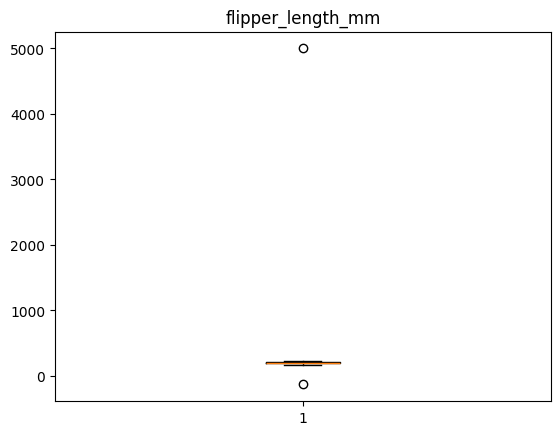

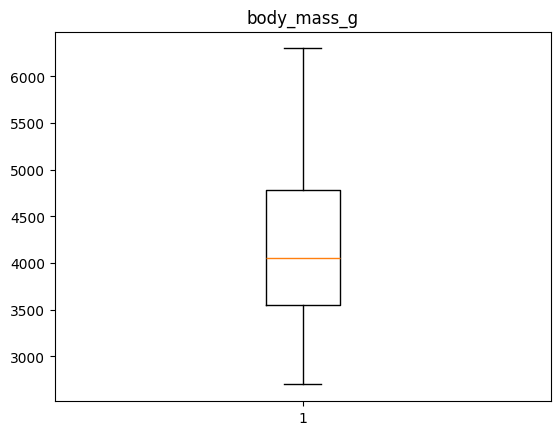

In [5]:
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numeric_cols:
    plt.boxplot(penguins_clean[col])
    plt.title(col)
    plt.show()

It can be seen that there are outliers in the 'flipper_length_mm' column.

In [6]:
penguins_clean = penguins_clean[
    (penguins_clean['flipper_length_mm'] > 0) &
    (penguins_clean['flipper_length_mm'] < 1000)
]

## Preprocessing the data

In [7]:
df_to_preprocess = pd.get_dummies(penguins_clean)
df_to_preprocess.drop('sex_.', axis=1, inplace=True)

In [8]:
scaler = StandardScaler()
penguins_preprocessed = pd.DataFrame(scaler.fit_transform(df_to_preprocess))
penguins_preprocessed.head()

,0,1,2,3,4,5
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


## Performing Principal Component Analysis (PCA)

In [9]:
pca = PCA()
pca.fit(penguins_preprocessed)

PCA()

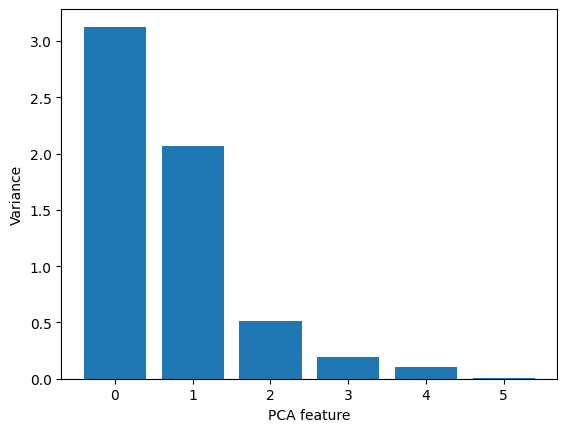

In [10]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

Defining n_components based on the number of components that have more than 10% explained variance ratio.

In [11]:
n_components = sum(pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)

In [12]:
penguins_PCA = pca.fit_transform(penguins_preprocessed)

## Determining the number of clusters

In [13]:
seed = 42

In [14]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=seed)
    model.fit(penguins_PCA)
    inertias.append(model.inertia_)

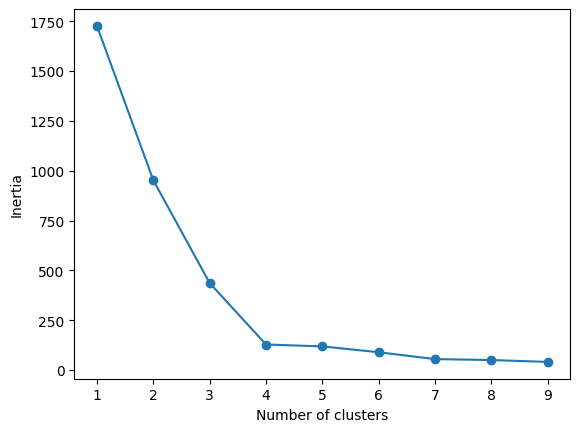

In [15]:
plt.plot(ks, inertias, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [16]:
n_clusters = 4

## Creating and fitting a k-means cluster model

In [17]:
kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
kmeans.fit(penguins_PCA)

KMeans(n_clusters=4, random_state=42)

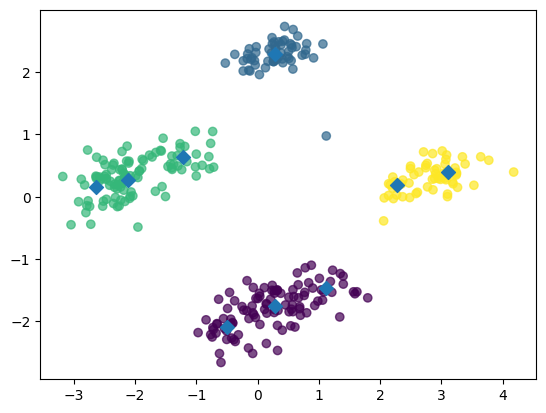

In [18]:
xs = penguins_PCA[:,0]
ys = penguins_PCA[:,1]
plt.scatter(xs, ys, c=kmeans.labels_, alpha=0.7)

centroids_x = model.cluster_centers_[:,0]
centroids_y = model.cluster_centers_[:,1]

plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

## Final statiscal DataFrame

Adding the labels from the k-means clustering to `penguins_clean`.

In [19]:
penguins_clean['label'] = kmeans.labels_
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
4,36.7,19.3,193.0,3450.0,FEMALE,2
5,39.3,20.6,190.0,3650.0,MALE,0


Creating a DataFrame called `stat_penguins` by grouping `penguins_clean` based on the "label" column and calculating the mean of each numeric column.

In [20]:
stat_penguins = penguins_clean.groupby('label')[numeric_cols].mean()

In [21]:
stat_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,45.545763,14.262712,212.779661,4683.050847
2,40.217757,17.611215,189.046729,3419.158879
3,49.473770,15.718033,221.540984,5484.836066
